# Natural Language Processing Real World Use-cases

#### [@ryasy_d](https://github.com/Ryas-Yusenda)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

# <font color='F13454'> HEADING1
## <font color='28A7EC'> HEADING2
### <font color='DFBB63'> HEADING3


In [2]:
## READ DATA
df = pd.read_csv('zomato.csv')

# <font color='F13454'> Predict the ratings of Zomato Restaurant

## <font color='28A7EC'>Finding Empty Values

In [3]:
## HITUNG ADA BERAPA DATA KOSONG PER KOLOM
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [4]:
## LIHAT SEMUA NAMA KOLOM
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
## LIHAT SEMUA NAMA KOLOM YANG KOSONG
[feature for feature in df.columns if df[feature].isnull().sum() > 0]


['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [6]:
## LIHAT SEMUA NAMA KOLOM YANG KOSONG
feature_na = []

for feature in df.columns:
   if df[feature].isnull().sum() > 0:
      feature_na.append(feature)

feature_na


['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [7]:
for feature in feature_na:
   print('{} has {} % missing values'. format(feature, np.round(df[feature].isnull().sum()/len(df)*100,4)))


rate has 15.0337 % missing values
phone has 2.3358 % missing values
location has 0.0406 % missing values
rest_type has 0.4389 % missing values
dish_liked has 54.2916 % missing values
cuisines has 0.087 % missing values
approx_cost(for two people) has 0.669 % missing values


In [8]:
##  Non-Null DATA
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

## <font color='28A7EC'>Delete Duplicate Values

In [9]:
## MELIHAT JUMLAH NILAI VALUE YANG BERBEDA PADA KOLOM df['name']
len(df['name'].unique())


8792

In [10]:
## MELIHAT JUMLAH NILAI VALUE YANG BERBEDA PADA SEMUA KOLOM
for feature in df.columns:
   print('{} has {} / {} unique data'. format(feature,len(df[feature].unique()),len(df)))


url has 51717 / 51717 unique data
address has 11495 / 51717 unique data
name has 8792 / 51717 unique data
online_order has 2 / 51717 unique data
book_table has 2 / 51717 unique data
rate has 65 / 51717 unique data
votes has 2328 / 51717 unique data
phone has 14927 / 51717 unique data
location has 94 / 51717 unique data
rest_type has 94 / 51717 unique data
dish_liked has 5272 / 51717 unique data
cuisines has 2724 / 51717 unique data
approx_cost(for two people) has 71 / 51717 unique data
reviews_list has 22513 / 51717 unique data
menu_item has 9098 / 51717 unique data
listed_in(type) has 7 / 51717 unique data
listed_in(city) has 30 / 51717 unique data


In [11]:
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [12]:
## MENCARI NILAI LISTED_IN(TYPE) YANG DIKELOMPOKAN BEDASARKAN NAMA DAN ALAMAT
grouped = df.groupby(["name", "address"]).agg({"listed_in(type)": list})
grouped.head()


,,listed_in(type)
name,address,
#FeelTheROLL,"Opposite Mantri Commercio, Outer Ring Road, Devarabisanahalli, Near Sakra World Hospital","[Delivery, Delivery]"
#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv..."
#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near Aliance Collage, Electronic City, Bangalore","[Buffet, Delivery, Dine-out]"
#refuel,"7, Ground Floor, RR Commercial Complex, Akshay Nagar, Bannerghatta Road, Bangalore","[Cafes, Delivery, Dine-out]"
'Brahmins' Thatte Idli,"19, 1st main, 2nd cross, 3rd stage, 3rd block, Basaveshwara Nagar, Bangalore",[Dine-out]


In [13]:
## GABUNGKAN DATAFRAME
new_def = pd.merge(grouped, df, on=(['name','address']))
new_def.shape


(51717, 18)

In [14]:
new_def.head()

,name,address,listed_in(type)_x,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)_y,listed_in(city)
0,#FeelTheROLL,"Opposite Mantri Commercio, Outer Ring Road, De...","[Delivery, Delivery]",https://www.zomato.com/bangalore/feeltheroll-b...,No,No,3.4/5,7,+91 9108342079\r\n+91 9886117901,Bellandur,Quick Bites,NaN,Fast Food,200,"[('Rated 5.0', ""RATED\n Had an egg chicken ro...",[],Delivery,Bellandur
1,#FeelTheROLL,"Opposite Mantri Commercio, Outer Ring Road, De...","[Delivery, Delivery]",https://www.zomato.com/bangalore/feeltheroll-b...,No,No,3.4 /5,7,+91 9108342079\n+91 9886117901,Bellandur,Quick Bites,NaN,Fast Food,200,"[('Rated 5.0', ""RATED\n Had an egg chicken ro...",[],Delivery,Sarjapur Road
2,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Delivery,BTM
3,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Dine-out,BTM
4,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Delivery,HSR


In [15]:
##HAPUS DATA YANG DUPLIKAT BERDASARKAN 3 KATEGORI ['address', 'name', 'listed_in(type)_y']
new_def.drop_duplicates(subset=['address', 'name', 'listed_in(type)_y'], inplace=True)
new_def.shape


(20915, 18)

In [16]:
## MENGUBAH INDEX
new_def = new_def.reset_index(drop=True)


In [17]:
new_def.head()

,name,address,listed_in(type)_x,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)_y,listed_in(city)
0,#FeelTheROLL,"Opposite Mantri Commercio, Outer Ring Road, De...","[Delivery, Delivery]",https://www.zomato.com/bangalore/feeltheroll-b...,No,No,3.4/5,7,+91 9108342079\r\n+91 9886117901,Bellandur,Quick Bites,NaN,Fast Food,200,"[('Rated 5.0', ""RATED\n Had an egg chicken ro...",[],Delivery,Bellandur
1,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Delivery,BTM
2,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Dine-out,BTM
3,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,NaN,"Continental, Chinese, Italian",700,"[('Rated 5.0', ""RATED\n Great service and don...",[],Buffet,Electronic City
4,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,NaN,"Continental, Chinese, Italian",700,"[('Rated 5.0', ""RATED\n Great service and don...",[],Delivery,Electronic City


## <font color='28A7EC'>Analysing ['rate']

In [18]:
## LIHAT TIPE SEMUA KOLOM
new_def.dtypes


name                           object
address                        object
listed_in(type)_x              object
url                            object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)_y              object
listed_in(city)                object
dtype: object

In [19]:
## LIHAT NILAI UNIK PADA KOLOM RATE
new_def['rate'].unique()


array(['3.4/5', '3.9/5', nan, '3.7/5', '3.2/5', '3.5/5', '4.6/5', '4.1/5',
       '4.2 /5', '4.3 /5', '4.2/5', '4.0/5', '4.0 /5', '3.9 /5', '4.1 /5',
       '3.7 /5', '4.3/5', '3.1 /5', '3.6/5', '3.1/5', '3.3/5', '3.0/5',
       '3.5 /5', '4.4/5', '4.5 /5', 'NEW', '3.3 /5', '3.8/5', '3.2 /5',
       '3.6 /5', '4.5/5', '3.8 /5', '3.4 /5', '2.7/5', '2.7 /5', '2.8/5',
       '3.0 /5', '2.9/5', '2.5 /5', '2.9 /5', '2.8 /5', '4.9/5', '4.7/5',
       '4.8/5', '4.8 /5', '4.4 /5', '1.8/5', '2.4/5', '2.1/5', '2.5/5',
       '-', '2.2/5', '4.7 /5', '2.6/5', '4.6 /5', '4.9 /5', '2.3/5',
       '2.0 /5', '2.3 /5', '2.6 /5', '2.4 /5', '2.0/5'], dtype=object)

In [20]:
## BUAT KOLOM BARU UNTUK MENGAMBIL 3 TEXT STRING PADA KOLOM RATE, CONTOH[3.4/5 => 3.4]
new_def['rating'] = new_def['rate'].str[:3]
new_def.head()


,name,address,listed_in(type)_x,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)_y,listed_in(city),rating
0,#FeelTheROLL,"Opposite Mantri Commercio, Outer Ring Road, De...","[Delivery, Delivery]",https://www.zomato.com/bangalore/feeltheroll-b...,No,No,3.4/5,7,+91 9108342079\r\n+91 9886117901,Bellandur,Quick Bites,NaN,Fast Food,200,"[('Rated 5.0', ""RATED\n Had an egg chicken ro...",[],Delivery,Bellandur,3.4
1,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Delivery,BTM,3.9
2,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Dine-out,BTM,3.9
3,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,NaN,"Continental, Chinese, Italian",700,"[('Rated 5.0', ""RATED\n Great service and don...",[],Buffet,Electronic City,NaN
4,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,NaN,"Continental, Chinese, Italian",700,"[('Rated 5.0', ""RATED\n Great service and don...",[],Delivery,Electronic City,NaN


In [21]:
## GANTI DATA 'NEW' dan '-' MENJADI 0. KARENA DATA TERSEBUT HARUSNYA ANGKA
new_def['rating'].replace('NEW', 0, inplace=True)
new_def['rating'].replace('-', 0, inplace=True)


In [22]:
## UBAH TIPE KOLOM RATING MENJADI NUMERIK
new_def['rating'] = pd.to_numeric(new_def['rating'])
new_def.dtypes

name                            object
address                         object
listed_in(type)_x               object
url                             object
online_order                    object
book_table                      object
rate                            object
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)     object
reviews_list                    object
menu_item                       object
listed_in(type)_y               object
listed_in(city)                 object
rating                         float64
dtype: object

In [23]:
## LIHAT SETIAP DATA YANG UNIK PADA KOLOM RATING
new_def['rating'].unique()

array([3.4, 3.9, nan, 3.7, 3.2, 3.5, 4.6, 4.1, 4.2, 4.3, 4. , 3.1, 3.6,
       3.3, 3. , 4.4, 4.5, 0. , 3.8, 2.7, 2.8, 2.9, 2.5, 4.9, 4.7, 4.8,
       1.8, 2.4, 2.1, 2.2, 2.6, 2.3, 2. ])

In [24]:
## DATA KOSONG PADA KOLOM RATING
new_def['rating'].isnull().sum()

3383

In [25]:
## BUAT KOLOM BARU BERNAMA ['rating_kategori'], DENGAN ISI KLASIFIKASI KOLOM ['rating']
new_def['rating_kategori'] = pd.cut(new_def['rating'], bins=[1, 3.25, 4.1, 5.0], labels=["0", "1", "2"])


<AxesSubplot:xlabel='rating_kategori', ylabel='count'>

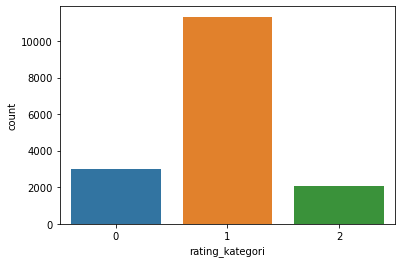

In [26]:
## TAMPILKAN PERBANDINGAN KLASIFIKASI KOLOM ['rating_kategori']
sns.countplot(new_def['rating_kategori'])

# 0 = LOW
# 1 = MEDIUM
# 2 = GOOD
 

## <font color='28A7EC'>Analysing ['reviews_list']

### <font color='DFBB63'> Clear Data In Column ['reviews_list']

In [27]:
## AMBIL CONTOH DATA PADA INDEK KE-0
rev = new_def['reviews_list'][0]
rev


'[(\'Rated 5.0\', "RATED\\n  Had an egg chicken roll and a paneer roll... Really yummy... A must visit place... It would be good if you guys can keep the shop open on Sunday\'s as well.. Good luck... :-)"), (\'Rated 5.0\', \'RATED\\n  Not just the Roll but the filling tastes great. I would highly recommend to others to try their rolls. Owners hospitality is also good and very friendly.\'), (\'Rated 4.5\', \'RATED\\n  Very nice place complete value for money ? Highly recommend.Must visit for any foodie . I would recommend the egg chicken roll . #feeltheroll\'), (\'Rated 5.0\', \'RATED\\n  Had an amazing mouth-watering ?chicken roll?Worth every bite..A must try for every foodie?A variety of rolls and sandwiches are available as well .. A budding rafflesia ?\')]'

In [28]:
## UBAH ISI DATA MEJADI LOWERCASE
rev = rev.lower()
rev


'[(\'rated 5.0\', "rated\\n  had an egg chicken roll and a paneer roll... really yummy... a must visit place... it would be good if you guys can keep the shop open on sunday\'s as well.. good luck... :-)"), (\'rated 5.0\', \'rated\\n  not just the roll but the filling tastes great. i would highly recommend to others to try their rolls. owners hospitality is also good and very friendly.\'), (\'rated 4.5\', \'rated\\n  very nice place complete value for money ? highly recommend.must visit for any foodie . i would recommend the egg chicken roll . #feeltheroll\'), (\'rated 5.0\', \'rated\\n  had an amazing mouth-watering ?chicken roll?worth every bite..a must try for every foodie?a variety of rolls and sandwiches are available as well .. a budding rafflesia ?\')]'

In [29]:
import re

In [30]:
## HAPUS ISI DATA KECUALI a-z , A_Z 
rev = re.sub('[^a-zA-Z]' ,' ' , rev)
rev


'   rated        rated n  had an egg chicken roll and a paneer roll    really yummy    a must visit place    it would be good if you guys can keep the shop open on sunday s as well   good luck             rated        rated n  not just the roll but the filling tastes great  i would highly recommend to others to try their rolls  owners hospitality is also good and very friendly       rated        rated n  very nice place complete value for money   highly recommend must visit for any foodie   i would recommend the egg chicken roll    feeltheroll      rated        rated n  had an amazing mouth watering  chicken roll worth every bite  a must try for every foodie a variety of rolls and sandwiches are available as well    a budding rafflesia     '

In [31]:
## HAPUS ISI DATA YANG ADA KATA 'rated'
rev = re.sub('rated' ,' ' , rev)
rev


'              n  had an egg chicken roll and a paneer roll    really yummy    a must visit place    it would be good if you guys can keep the shop open on sunday s as well   good luck                        n  not just the roll but the filling tastes great  i would highly recommend to others to try their rolls  owners hospitality is also good and very friendly                  n  very nice place complete value for money   highly recommend must visit for any foodie   i would recommend the egg chicken roll    feeltheroll                 n  had an amazing mouth watering  chicken roll worth every bite  a must try for every foodie a variety of rolls and sandwiches are available as well    a budding rafflesia     '

In [32]:
## HAPUS ISI DATA YANG SPASI BERLEBIH
rev = re.sub(' +', ' ', rev)
rev


' n had an egg chicken roll and a paneer roll really yummy a must visit place it would be good if you guys can keep the shop open on sunday s as well good luck n not just the roll but the filling tastes great i would highly recommend to others to try their rolls owners hospitality is also good and very friendly n very nice place complete value for money highly recommend must visit for any foodie i would recommend the egg chicken roll feeltheroll n had an amazing mouth watering chicken roll worth every bite a must try for every foodie a variety of rolls and sandwiches are available as well a budding rafflesia '

### <font color='DFBB63'>Creating Wordcloud

In [33]:
## MEMBUAT FUNGSI UNTUK MENYATUKAN SEMUA DATA DI KOLOM ['reviews_list']
def t_review(data):
   t_rev = ''
   for review in new_def['reviews_list']:
      review = review.lower()
      review = re.sub('[^a-zA-Z]', ' ', review)
      review = re.sub('rated', ' ', review)
      review = re.sub('x', ' ', review)
      review = re.sub(' +', ' ', review)
      t_rev = t_rev + str(review)
   
   ##SIMPAN DATA KE BENTUK TXT
   f = open("total_reviev.txt", "w")
   f.write(t_rev)
   
   return t_rev


In [34]:
## JALANKAN FUNGSI
total_reviev = t_review(new_def['reviews_list'])

## ATAU AMBIL DARI DATA SEBELUMNYA YANG PERNAH DIJALANKAN
#total_reviev = open("total_reviev.txt", "r").read()


In [35]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS


In [36]:
## MENGAMBIL STOPWORDS
stopwords1 = STOPWORDS


(-0.5, 799.5, 799.5, -0.5)

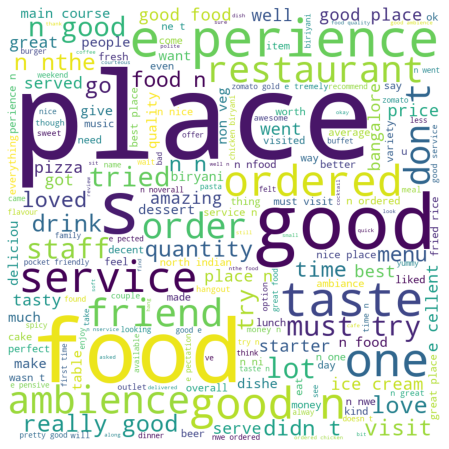

In [37]:
## MEMBUAT VISUALISASI DATA WORDLOUD
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords1,
                      min_font_size=10).generate(total_reviev)

# PLOT THE WORDCLOUD IMAGE
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")


### <font color='DFBB63'>Remove Stopwords

In [38]:
from nltk.corpus import RegexpTokenizer as regextoken


In [39]:
## MENGUBAH SEMUA ISI DATA PADA ["reviews_list"] MENJADI LOWCASE
new_def["reviews_list"] = new_def["reviews_list"].apply(lambda x: x.lower())


In [40]:
## MEMBUAT REGEX DARI a-z, A-Z, + ADALAH SPASI BERLEBIH.
tokenizer = regextoken("[a-zA-Z]+")


In [41]:
## LIHAT ["reviews_list"] DATA SEBANYAK 5
new_def["reviews_list"].head()


0    [('rated 5.0', "rated\n  had an egg chicken ro...
1    [('rated 4.0', 'rated\n  this little cafe is s...
2    [('rated 4.0', 'rated\n  this little cafe is s...
3    [('rated 5.0', "rated\n  great service and don...
4    [('rated 5.0', "rated\n  great service and don...
Name: reviews_list, dtype: object

In [42]:
## GUNAKAN REGEX UNTUK MEMBERSIHKAN DATA
new_def["reviews_list"] = new_def["reviews_list"].apply(tokenizer.tokenize)


In [43]:
## LIHAT ["reviews_list"] DATA SEBANYAK 5
new_def["reviews_list"].head()


0    [rated, rated, n, had, an, egg, chicken, roll,...
1    [rated, rated, n, this, little, cafe, is, set,...
2    [rated, rated, n, this, little, cafe, is, set,...
3    [rated, rated, n, great, service, and, don, t,...
4    [rated, rated, n, great, service, and, don, t,...
Name: reviews_list, dtype: object

In [44]:
from nltk.corpus import stopwords

In [45]:
## TAMPILKAN STOPWORD
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [46]:
## TAMBAHKAN STOPWORD PADA VARIABLE STOP
stop.extend(["rated", "n", "nan", "x"])


In [47]:
## AMBIL SEMUA ISI KOLOM REVIEW  
rev = new_def["reviews_list"]
print(rev[0])


['rated', 'rated', 'n', 'had', 'an', 'egg', 'chicken', 'roll', 'and', 'a', 'paneer', 'roll', 'really', 'yummy', 'a', 'must', 'visit', 'place', 'it', 'would', 'be', 'good', 'if', 'you', 'guys', 'can', 'keep', 'the', 'shop', 'open', 'on', 'sunday', 's', 'as', 'well', 'good', 'luck', 'rated', 'rated', 'n', 'not', 'just', 'the', 'roll', 'but', 'the', 'filling', 'tastes', 'great', 'i', 'would', 'highly', 'recommend', 'to', 'others', 'to', 'try', 'their', 'rolls', 'owners', 'hospitality', 'is', 'also', 'good', 'and', 'very', 'friendly', 'rated', 'rated', 'n', 'very', 'nice', 'place', 'complete', 'value', 'for', 'money', 'highly', 'recommend', 'must', 'visit', 'for', 'any', 'foodie', 'i', 'would', 'recommend', 'the', 'egg', 'chicken', 'roll', 'feeltheroll', 'rated', 'rated', 'n', 'had', 'an', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'a', 'must', 'try', 'for', 'every', 'foodie', 'a', 'variety', 'of', 'rolls', 'and', 'sandwiches', 'are', 'available', 'as', 'w

In [48]:
## BUAT FUNGSI UNTUK MENGHAPUS STOPWORDS
def remove_stopwords(text):
    updated_text = [token for token in text if token not in stop]
    return updated_text
 
'''
#ATAU SAMA DENGAN

rev_f=[]
for token in rev:
   if token not in stop:
      rev_f.append(token)

print(rev_f)
'''

'\n#ATAU SAMA DENGAN\n\nrev_f=[]\nfor token in rev:\n   if token not in stop:\n      rev_f.append(token)\n\nprint(rev_f)\n'

In [49]:
## MENGHAPUS SEMUA STOPWORD YANG ADA
rev = rev.apply(remove_stopwords)


In [50]:
## TAMPILKAN SALAH SATU BARIS REVIEW YANG TELAH DIBERSIHKAN STOPWORDS NYA
print(rev[0])
len(rev)


['egg', 'chicken', 'roll', 'paneer', 'roll', 'really', 'yummy', 'must', 'visit', 'place', 'would', 'good', 'guys', 'keep', 'shop', 'open', 'sunday', 'well', 'good', 'luck', 'roll', 'filling', 'tastes', 'great', 'would', 'highly', 'recommend', 'others', 'try', 'rolls', 'owners', 'hospitality', 'also', 'good', 'friendly', 'nice', 'place', 'complete', 'value', 'money', 'highly', 'recommend', 'must', 'visit', 'foodie', 'would', 'recommend', 'egg', 'chicken', 'roll', 'feeltheroll', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'must', 'try', 'every', 'foodie', 'variety', 'rolls', 'sandwiches', 'available', 'well', 'budding', 'rafflesia']


20915

### <font color='DFBB63'>Prepare Word Frequency

In [51]:
## MENGGABUNGKAN SEMUA ULASAN UNTUK MENGHITUNG FREKUENSI SETIAP KATA
all_reviews = rev.astype(str).str.cat()


In [52]:
## MELIHAT [0:100] ULASAN YANG MASIH DALAM BENTUR STR
print(all_reviews[0:100])
print(type(all_reviews))


['egg', 'chicken', 'roll', 'paneer', 'roll', 'really', 'yummy', 'must', 'visit', 'place', 'would', '
<class 'str'>


In [53]:
## LAKUKAN TOKENISASI UNTUK MENGUBAH STRING (all_reviews) MENJADI LIST
cleaned_reviews = tokenizer.tokenize(all_reviews)


In [54]:
# MELIHAT [0:100] ULASAN YANG SUDAH DALAM BENTUR LIST
print(cleaned_reviews[0:100])
print(type(cleaned_reviews))


['egg', 'chicken', 'roll', 'paneer', 'roll', 'really', 'yummy', 'must', 'visit', 'place', 'would', 'good', 'guys', 'keep', 'shop', 'open', 'sunday', 'well', 'good', 'luck', 'roll', 'filling', 'tastes', 'great', 'would', 'highly', 'recommend', 'others', 'try', 'rolls', 'owners', 'hospitality', 'also', 'good', 'friendly', 'nice', 'place', 'complete', 'value', 'money', 'highly', 'recommend', 'must', 'visit', 'foodie', 'would', 'recommend', 'egg', 'chicken', 'roll', 'feeltheroll', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'must', 'try', 'every', 'foodie', 'variety', 'rolls', 'sandwiches', 'available', 'well', 'budding', 'rafflesia', 'little', 'cafe', 'set', 'beautiful', 'location', 'ambiance', 'good', 'nthe', 'burger', 'filled', 'taste', 'chicken', 'nthe', 'banana', 'chocolate', 'sandwich', 'variety', 'would', 'never', 'find', 'restaurants', 'bangalore', 'drinks', 'wonderful', 'lot', 'flavours', 'choose', 'nit', 'took', 'little']
<class 'list'>


### <font color='DFBB63'>Create a Unigram Frequency Plot

In [55]:
from nltk import FreqDist


In [56]:
fd = FreqDist()

In [57]:
## MEMBUAT UNIGRAM ANALISIS
for word in cleaned_reviews:
   fd[word] += 1

In [58]:
fd.most_common(10)

[('good', 328304),
 ('place', 317915),
 ('food', 307405),
 ('chicken', 141301),
 ('service', 109512),
 ('ordered', 104221),
 ('taste', 93617),
 ('great', 93079),
 ('one', 88024),
 ('ambience', 85868)]

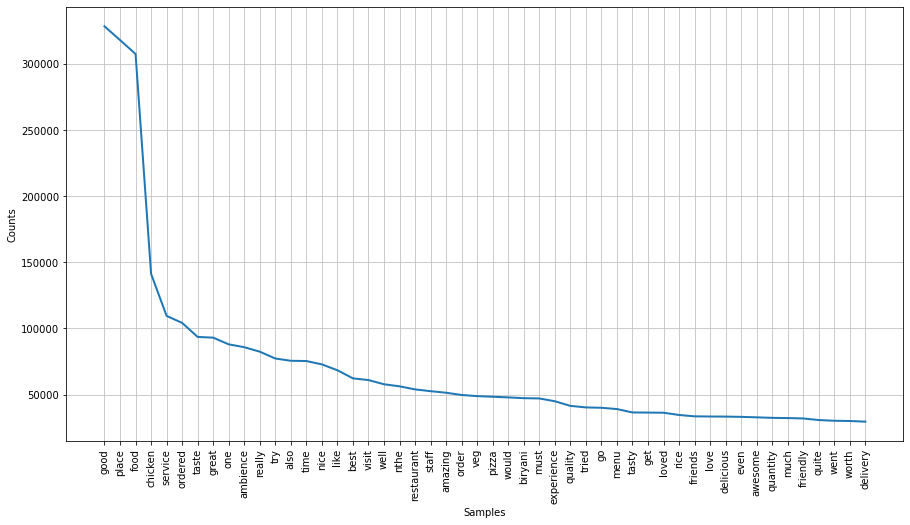

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [59]:
## MENAMPILKAN PLOT UNIGRAM ANALISIS
plt.figure(figsize=(15,8))
fd.plot(50)


<font color='D19A66'>
Faktor-faktor yang berkontribusi terhadap pengalaman restoran disebutkan dalam urutan frekuensi (menurun) berikut:

place > service > taste > ambience >time> staff > quality > menu  > quantity > friendly > delivery>.
</font>

### <font color='DFBB63'>Create a Bigram Frequency Plot

In [60]:
from nltk import bigrams 


In [61]:
fd_bigram = FreqDist()


In [62]:
## MEMBUAT BIGRAMS DARI cleaned_reviews
bigrams = bigrams(cleaned_reviews)


In [63]:
## MEMBUAT BIIGRAM ANALISIS
for bigram in bigrams:
   fd_bigram[bigram] += 1


In [64]:
fd_bigram.most_common(10)

[(('must', 'try'), 23182),
 (('really', 'good'), 22564),
 (('good', 'food'), 21589),
 (('food', 'good'), 21175),
 (('good', 'place'), 18690),
 (('visit', 'place'), 15832),
 (('non', 'veg'), 13561),
 (('one', 'best'), 13537),
 (('main', 'course'), 13470),
 (('ice', 'cream'), 12961)]

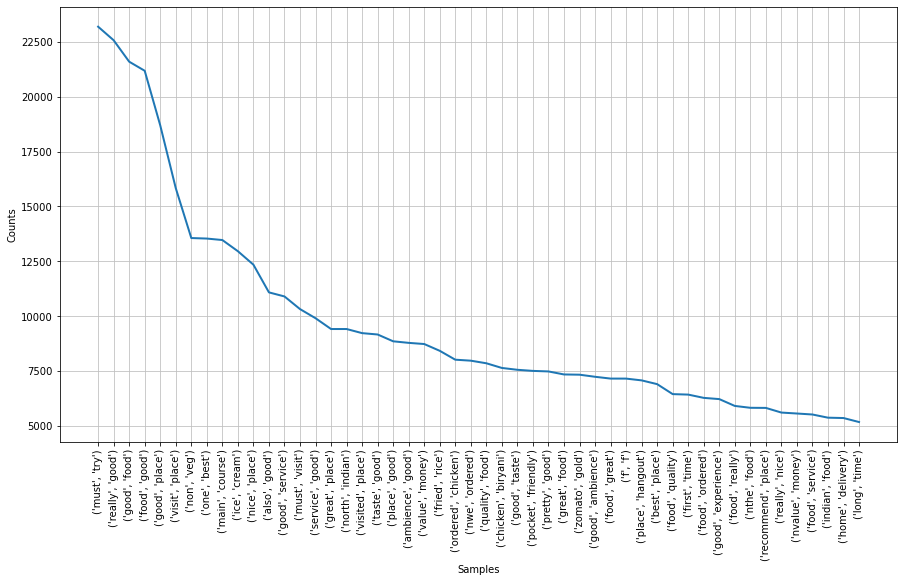

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [65]:
## MENAMPILKAN PLOT BIGRAM ANALISIS
plt.figure(figsize=(15,8))
fd_bigram.plot(50)


<font color='D19A66'>
Faktor-faktor yang berkontribusi terhadap pengalaman restoran adalah:

good food > good place > good service > value (for) money > pocket friendly > ambience good.

Ada kata kunci di sini: faktor biaya, yang terlewatkan oleh jumlah frekuensi kata UNIGRAM, diambil oleh jumlah frekuensi BIGRAM.
</font>

### <font color='DFBB63'>Create a Trigram Frequency Plot

In [66]:
from nltk import trigrams


In [67]:
fd_trigram = FreqDist()

In [68]:
## MEMBUAT TRIGRAMS DARI cleaned_reviews
trigrams = trigrams(cleaned_reviews)


In [69]:
## MEMBUAT TRIGRAM ANALISIS
for trigram in trigrams:
   fd_trigram[trigram] += 1


In [70]:
fd_trigram.most_common(10)

[(('must', 'visit', 'place'), 3982),
 (('f', 'f', 'f'), 3916),
 (('veg', 'non', 'veg'), 3734),
 (('north', 'indian', 'food'), 3433),
 (('place', 'hangout', 'friends'), 2824),
 (('food', 'really', 'good'), 2526),
 (('xa', 'xa', 'xa'), 2477),
 (('good', 'food', 'good'), 2205),
 (('place', 'hang', 'friends'), 1948),
 (('nfood', 'nambience', 'nservice'), 1931)]

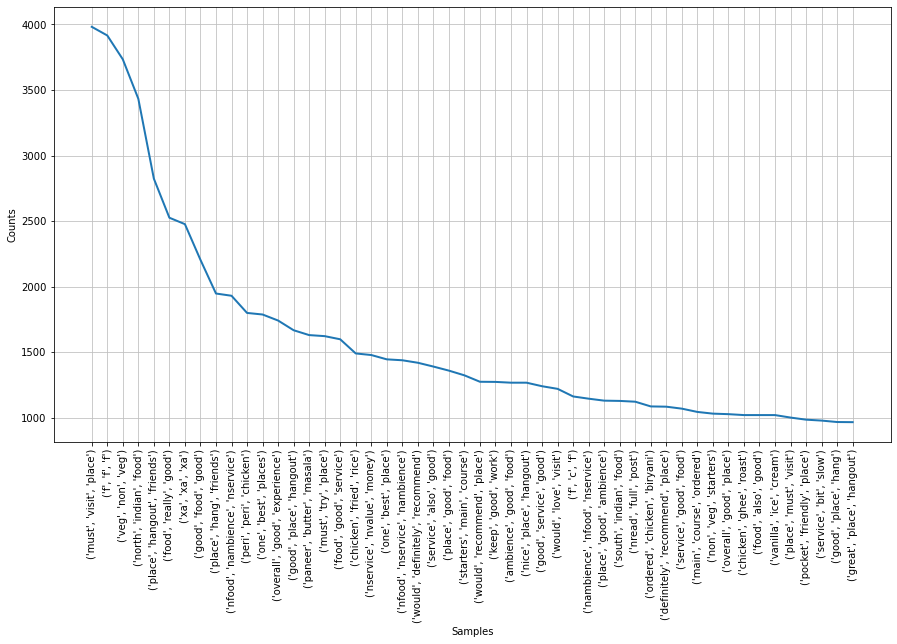

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [71]:
## MENAMPILKAN PLOT TRIGRAM ANALISIS
plt.figure(figsize=(15,8))
fd_trigram.plot(50)


<font color='D19A66'>Preferensi makanan khusus yang dapat kita lihat di sini adalah north Indian Food, paneer butter masala, chicken fried rice, chicken ghee roast etc.</font>

## <font color='28A7EC'>Analysing ['cuisines']

### <font color='DFBB63'>Clean Data ['cuisines','rating_kategori']

In [72]:
## LIHAT NAMA KOLOM PADA DATAFRAME
new_def.columns

Index(['name', 'address', 'listed_in(type)_x', 'url', 'online_order',
       'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type',
       'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'menu_item', 'listed_in(type)_y', 'listed_in(city)', 'rating',
       'rating_kategori'],
      dtype='object')

In [73]:
## AMBIL DATA YANG DIPERLUKAN DAN SIMPAN PADA DATAFRAME BARU
cuisines = new_def[['cuisines','rating_kategori']]
cuisines.head()


,cuisines,rating_kategori
0,Fast Food,1
1,"Fast Food, Beverages",1
2,"Fast Food, Beverages",1
3,"Continental, Chinese, Italian",NaN
4,"Continental, Chinese, Italian",NaN


In [74]:
## CEK DATA YANG KOSONG
cuisines.isnull().sum()

cuisines             23
rating_kategori    4524
dtype: int64

In [75]:
## HAPUS DATA DATA YANG KOSONG
print(cuisines.shape)
cuisines.dropna(inplace=True)
print(cuisines.shape)


(20915, 2)
(16388, 2)


In [76]:
## CEK DATA YANG KOSONG
cuisines.isnull().sum()

cuisines           0
rating_kategori    0
dtype: int64

### <font color='DFBB63'>Analysing Most famous ['cuisines']

In [77]:
## UBAH SEMUA ISI DATA MENJADI LOWERCASE
cuisines['cuisines'] = cuisines['cuisines'].apply(lambda x: x.lower())
cuisines.head()


,cuisines,rating_kategori
0,fast food,1
1,"fast food, beverages",1
2,"fast food, beverages",1
6,"cafe, beverages",1
7,"cafe, beverages",1


In [78]:
## BERSIHKAN KATA SELAIN HURUF (a-z A-Z) DAN SPASI BERLEBIH
cuisines['cuisines'] = cuisines['cuisines'].apply(tokenizer.tokenize)
cuisines.head()


,cuisines,rating_kategori
0,"[fast, food]",1
1,"[fast, food, beverages]",1
2,"[fast, food, beverages]",1
6,"[cafe, beverages]",1
7,"[cafe, beverages]",1


In [79]:
## SATUKAN SEMUA ISI KOLOM ['cuisines'] dalam bentur str
all_cuisines = cuisines['cuisines'].astype(str).str.cat()


In [80]:
## BERSIHKAN KATA SELAIN HURUF (a-z A-Z) DAN SPASI BERLEBIH
clean_cuisines = tokenizer.tokenize(all_cuisines)


In [81]:
fd_cuisines = FreqDist()

In [82]:
## MEMBUAT ANALASIS UNIGRAM
for cuisines in clean_cuisines:
   fd_cuisines[cuisines] +=1


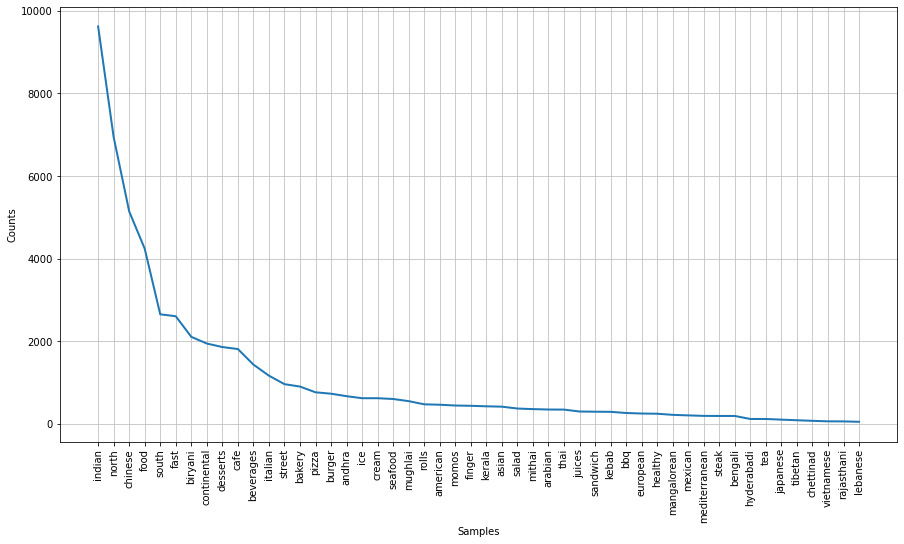

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [83]:
## MENAMPILKAN PLOT ANALISIS
plt.figure(figsize=(15, 8))
fd_cuisines.plot(50)


## <font color='28A7EC'> How to prepare our data for Machine Learning.

### <font color='DFBB63'> Prepare Data

In [84]:
new_def.dtypes

name                             object
address                          object
listed_in(type)_x                object
url                              object
online_order                     object
book_table                       object
rate                             object
votes                             int64
phone                            object
location                         object
rest_type                        object
dish_liked                       object
cuisines                         object
approx_cost(for two people)      object
reviews_list                     object
menu_item                        object
listed_in(type)_y                object
listed_in(city)                  object
rating                          float64
rating_kategori                category
dtype: object

In [85]:
new_def[["reviews_list", "menu_item", "dish_liked", "cuisines"]] = new_def[[
    "reviews_list", "menu_item", "dish_liked", "cuisines"]].astype("str")


In [86]:
new_def["text"] = new_def["reviews_list"] + " " + new_def["menu_item"] + \
    " " + new_def["dish_liked"] + " " + new_def["cuisines"]


In [87]:
new_def.head()

,name,address,listed_in(type)_x,url,online_order,book_table,rate,votes,phone,location,...,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)_y,listed_in(city),rating,rating_kategori,text
0,#FeelTheROLL,"Opposite Mantri Commercio, Outer Ring Road, De...","[Delivery, Delivery]",https://www.zomato.com/bangalore/feeltheroll-b...,No,No,3.4/5,7,+91 9108342079\r\n+91 9886117901,Bellandur,...,nan,Fast Food,200,"['rated', 'rated', 'n', 'had', 'an', 'egg', 'c...",[],Delivery,Bellandur,3.4,1,"['rated', 'rated', 'n', 'had', 'an', 'egg', 'c..."
1,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,...,Burgers,"Fast Food, Beverages",400,"['rated', 'rated', 'n', 'this', 'little', 'caf...",[],Delivery,BTM,3.9,1,"['rated', 'rated', 'n', 'this', 'little', 'caf..."
2,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,...,Burgers,"Fast Food, Beverages",400,"['rated', 'rated', 'n', 'this', 'little', 'caf...",[],Dine-out,BTM,3.9,1,"['rated', 'rated', 'n', 'this', 'little', 'caf..."
3,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,...,nan,"Continental, Chinese, Italian",700,"['rated', 'rated', 'n', 'great', 'service', 'a...",[],Buffet,Electronic City,NaN,NaN,"['rated', 'rated', 'n', 'great', 'service', 'a..."
4,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,...,nan,"Continental, Chinese, Italian",700,"['rated', 'rated', 'n', 'great', 'service', 'a...",[],Delivery,Electronic City,NaN,NaN,"['rated', 'rated', 'n', 'great', 'service', 'a..."


In [88]:
text_data = new_def[['text', 'rating_kategori']]


In [89]:
text_data.head()

,text,rating_kategori
0,"['rated', 'rated', 'n', 'had', 'an', 'egg', 'c...",1
1,"['rated', 'rated', 'n', 'this', 'little', 'caf...",1
2,"['rated', 'rated', 'n', 'this', 'little', 'caf...",1
3,"['rated', 'rated', 'n', 'great', 'service', 'a...",NaN
4,"['rated', 'rated', 'n', 'great', 'service', 'a...",NaN


### <font color='DFBB63'> Prepare Colum ['text']

In [90]:
text_data['text'][0]

"['rated', 'rated', 'n', 'had', 'an', 'egg', 'chicken', 'roll', 'and', 'a', 'paneer', 'roll', 'really', 'yummy', 'a', 'must', 'visit', 'place', 'it', 'would', 'be', 'good', 'if', 'you', 'guys', 'can', 'keep', 'the', 'shop', 'open', 'on', 'sunday', 's', 'as', 'well', 'good', 'luck', 'rated', 'rated', 'n', 'not', 'just', 'the', 'roll', 'but', 'the', 'filling', 'tastes', 'great', 'i', 'would', 'highly', 'recommend', 'to', 'others', 'to', 'try', 'their', 'rolls', 'owners', 'hospitality', 'is', 'also', 'good', 'and', 'very', 'friendly', 'rated', 'rated', 'n', 'very', 'nice', 'place', 'complete', 'value', 'for', 'money', 'highly', 'recommend', 'must', 'visit', 'for', 'any', 'foodie', 'i', 'would', 'recommend', 'the', 'egg', 'chicken', 'roll', 'feeltheroll', 'rated', 'rated', 'n', 'had', 'an', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'a', 'must', 'try', 'for', 'every', 'foodie', 'a', 'variety', 'of', 'rolls', 'and', 'sandwiches', 'are', 'available', 'as', '

`KALAU KALAU INGIN AMBIL BEBERAPA SAMPE`

In [91]:
## KALAU INGIN AMBIL BEBERAPA SAMPE

df_ml = text_data.sample(n=2000) #Ambil 2000 sample
df_ml.reset_index(inplace=True)  #reset index
df_ml.drop('index', axis=1, inplace=True) #hapus kolom 'index'
df_ml.shape #Lihat ukuran  Dataframe
#text_data = df_ml

(2000, 2)

In [92]:
text_data.isnull().sum()

text                  0
rating_kategori    4524
dtype: int64

`Hapus Data yang Kosong dan Duplikat`

In [93]:
text_data.shape

(20915, 2)

In [94]:
text_data.dropna(inplace=True)
text_data.drop_duplicates(inplace=True)
print(text_data.shape)
text_data.head()

(13065, 2)


,text,rating_kategori
0,"['rated', 'rated', 'n', 'had', 'an', 'egg', 'c...",1
1,"['rated', 'rated', 'n', 'this', 'little', 'caf...",1
6,"['rated', 'rated', 'n', 'we', 'ordered', 'for'...",1
7,"['rated', 'rated', 'n', 'we', 'ordered', 'for'...",1
11,"['rated', 'rated', 'n', 'ordered', 'a', 'chick...",0


`what all things, u have to apply on your text column, basically`<br>
`a.lowercase`<br>
`b.tokenization`<br>
`c.remove stopwords`<br>
`d.lemmatization`<br>


   `a.lowercase`

In [95]:
text_data.shape

(13065, 2)

In [96]:
text_data['text'] = text_data['text'].apply(lambda x:x.lower())

`b.tokenization`

In [97]:
text_data['text'] = text_data['text'].apply(tokenizer.tokenize)

In [98]:
print(text_data['text'][0])


['rated', 'rated', 'n', 'had', 'an', 'egg', 'chicken', 'roll', 'and', 'a', 'paneer', 'roll', 'really', 'yummy', 'a', 'must', 'visit', 'place', 'it', 'would', 'be', 'good', 'if', 'you', 'guys', 'can', 'keep', 'the', 'shop', 'open', 'on', 'sunday', 's', 'as', 'well', 'good', 'luck', 'rated', 'rated', 'n', 'not', 'just', 'the', 'roll', 'but', 'the', 'filling', 'tastes', 'great', 'i', 'would', 'highly', 'recommend', 'to', 'others', 'to', 'try', 'their', 'rolls', 'owners', 'hospitality', 'is', 'also', 'good', 'and', 'very', 'friendly', 'rated', 'rated', 'n', 'very', 'nice', 'place', 'complete', 'value', 'for', 'money', 'highly', 'recommend', 'must', 'visit', 'for', 'any', 'foodie', 'i', 'would', 'recommend', 'the', 'egg', 'chicken', 'roll', 'feeltheroll', 'rated', 'rated', 'n', 'had', 'an', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'a', 'must', 'try', 'for', 'every', 'foodie', 'a', 'variety', 'of', 'rolls', 'and', 'sandwiches', 'are', 'available', 'as', 'w

`c.remove stopwords`

In [99]:
text_data['text'] = text_data['text'].apply(remove_stopwords)

In [100]:
print(text_data['text'][0])


['egg', 'chicken', 'roll', 'paneer', 'roll', 'really', 'yummy', 'must', 'visit', 'place', 'would', 'good', 'guys', 'keep', 'shop', 'open', 'sunday', 'well', 'good', 'luck', 'roll', 'filling', 'tastes', 'great', 'would', 'highly', 'recommend', 'others', 'try', 'rolls', 'owners', 'hospitality', 'also', 'good', 'friendly', 'nice', 'place', 'complete', 'value', 'money', 'highly', 'recommend', 'must', 'visit', 'foodie', 'would', 'recommend', 'egg', 'chicken', 'roll', 'feeltheroll', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'must', 'try', 'every', 'foodie', 'variety', 'rolls', 'sandwiches', 'available', 'well', 'budding', 'rafflesia', 'fast', 'food']


`d.lemmatization`

In [101]:
from nltk.stem import WordNetLemmatizer

In [102]:
wl = WordNetLemmatizer()

In [103]:
## BUAT FUNGSI LEMMATIZATION

def lem(text):
   return [wl.lemmatize(word) for word in text]


In [104]:
## APLIKASIKAN FUNGSI LEMMATIZATION
text_data['text'] = text_data['text'].apply(lem)


In [105]:
text_data.reset_index(inplace=True)  # RESET INDEX
text_data.drop('index', axis=1, inplace=True)  # HAPUS KOLOM 'INDEX'


In [106]:
text_data.head()


,text,rating_kategori
0,"[egg, chicken, roll, paneer, roll, really, yum...",1
1,"[little, cafe, set, beautiful, location, ambia...",1
2,"[ordered, schezwan, paneer, sandwich, combo, t...",1
3,"[ordered, schezwan, paneer, sandwich, combo, t...",1
4,"[ordered, chicken, subwich, offer, suggestion,...",0


### <font color='DFBB63'> Prepare Colum ['rating_kategori']

In [107]:
from sklearn.preprocessing import LabelEncoder


In [108]:
le = LabelEncoder()

In [109]:
## TRASFORMASI RATING KATEGORI MENJADI VEKTOR UNTUK ML
text_data['rating_kategori'] = le.fit_transform(text_data['rating_kategori'])


<h4>CONTOH SEPERTI INI</h4>
<img src="pic/1.png">

### <font color='DFBB63'> Applying TF-IDF on Text data

In [110]:
## AMBIL DATA text_data['text'] KE VARIABLE token_new
token_new = text_data['text']


In [111]:
print(token_new[0])

['egg', 'chicken', 'roll', 'paneer', 'roll', 'really', 'yummy', 'must', 'visit', 'place', 'would', 'good', 'guy', 'keep', 'shop', 'open', 'sunday', 'well', 'good', 'luck', 'roll', 'filling', 'taste', 'great', 'would', 'highly', 'recommend', 'others', 'try', 'roll', 'owner', 'hospitality', 'also', 'good', 'friendly', 'nice', 'place', 'complete', 'value', 'money', 'highly', 'recommend', 'must', 'visit', 'foodie', 'would', 'recommend', 'egg', 'chicken', 'roll', 'feeltheroll', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'must', 'try', 'every', 'foodie', 'variety', 'roll', 'sandwich', 'available', 'well', 'budding', 'rafflesia', 'fast', 'food']


In [112]:
' '.join(token_new[0])

'egg chicken roll paneer roll really yummy must visit place would good guy keep shop open sunday well good luck roll filling taste great would highly recommend others try roll owner hospitality also good friendly nice place complete value money highly recommend must visit foodie would recommend egg chicken roll feeltheroll amazing mouth watering chicken roll worth every bite must try every foodie variety roll sandwich available well budding rafflesia fast food'

In [113]:
## COLLECT ENTIRE DATA INTO CORPUS AS WE HAVE TO NLP TECHNIQUES TO THIS CORPUS TO CONVERT IT INTO SOME VECTORS

corpus=[]

for i in token_new.index:
   review = ' '.join(token_new[i])
   corpus.append(review)


In [114]:
# CREATING THE TF_IDF MODEL

from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()

X = cv.fit_transform(corpus).toarray()

<h4>CONTOH SEPERTI INI</h4>
<img src="pic/2.png">

In [115]:
#print(X)
print(X[0:10])


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.01445687 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.01081349 0.         0.         ... 0.         0.         0.        ]]


## <font color='28A7EC'> Machine Learning Logistic Regression


### <font color='DFBB63'> Build Logistic Regression Model Evaluate It

`X -- independent data` <br>
`y(text_data['rating_kategori']) -- dependent data`

In [128]:
from sklearn.model_selection import train_test_split


In [129]:
# Splitting the data into train and test sets (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, text_data['rating_kategori'], test_size=0.3, random_state=0, stratify=text_data['rating_kategori'])


In [130]:
from sklearn.linear_model import LogisticRegression


In [131]:
lr = LogisticRegression(multi_class='multinomial')

In [132]:
lr.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [133]:
# Make predictions.
predictions = lr.predict(X_test)

In [134]:
# Compute the error.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predictions, y_test))

[[ 181   52    0]
 [ 505 2549  231]
 [   2   54  346]]


In [135]:
from sklearn.metrics import accuracy_score
print(accuracy_score(predictions, y_test))

0.7846938775510204
